# Simple Linear Regression Model


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels 
import statsmodels.api as sm 


In [3]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


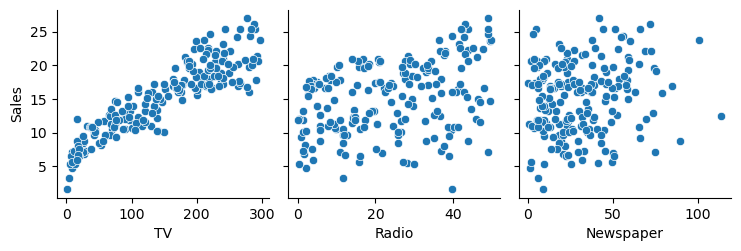

In [11]:
sns.pairplot(x_vars=['TV','Radio','Newspaper'],y_vars='Sales',data=df)

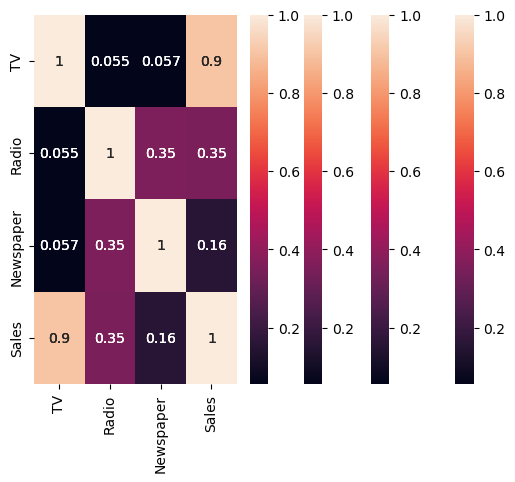

In [17]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [15]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [18]:
import sklearn 
from sklearn.model_selection import train_test_split


In [20]:
y=df['Sales']
X =df['TV']

In [22]:
X_train , X_test , y_train ,y_test = train_test_split(X,y,train_size=0.8,random_state=100)

In [24]:
X_train_sm = sm.add_constant(X_train)

In [26]:
model = sm.OLS(y_train,X_train_sm).fit()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     727.7
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           5.03e-61
Time:                        17:49:56   Log-Likelihood:                -359.57
No. Observations:                 160   AIC:                             723.1
Df Residuals:                     158   BIC:                             729.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9955      0.343     20.386      0.000       6.318       7.673
TV             0.0541      0.002     26.976      0.000       0.050       0.058
==============================================================================
Omnibus:                        0.122   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.941   Jarque-Bera (JB):                0.029
Skew:                           0.032   Prob(JB):                        0.986
Kurtosis:                       3.014   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model.params

const    6.995533
TV       0.054105
dtype: float64

## We find that constant is 6.99 and Intercept is 0.054105

### Model accuracy is 82% after observing a value of 0.822 of R^2